<a href="https://colab.research.google.com/github/davip99/Proyecto-Luca/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO LUCA - GRUPO 04

## Indice

## Sumario

## Resumen

## Informes

### Listado de los juegos:
Para poder trabajar con una base de datos, lo primero que debe hacerse es cargar dicha base de datos

In [ ]:
from google.colab import files
files.upload()

#### Todos los juegos
El siguiente código mostrará los juegos guardados en la base de datos

In [2]:
import pandas as pd
df = pd.read_csv("src/csv/vgsales.csv")
print(df["Name"])

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16593                  Woody Woodpecker in Crazy Castle 5
16594                       Men in Black II: Alien Escape
16595    SCORE International Baja 1000: The Official Game
16596                                          Know How 2
16597                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object


#### Solo 25 juegos
El siguiente código mostrará los 25 primeros juegos guardados en la base de datos

In [ ]:
print(df["Name"].head(25))

#### Con todas las columnas
El siguiente código mostrará la lista completa de juegos guardados en la base de datos

In [ ]:
print(df)

#### Todas las columnas menos las de ventas


In [ ]:
print(df.iloc[:, [0, 1, 2, 3, 4, 5]])

#### Ordenados por género

In [ ]:
print(df.sort_values(by="Genre"))

### Listados filtrados

#### Juegos de Nintendo

In [ ]:
print(df[df.Publisher == 'Nintendo'][['Name', 'Publisher']])

#### Juegos del siglo XX

#### Juegos lanzados en años pares

In [ ]:
print(df[df["Year"]%2==0])

### Listado de ventas

#### Top 15 juegos más vendidos del mundo

In [3]:
top = df.sort_values(by='Global_Sales', ascending=False).head(15)
print(top[['Rank', 'Name', 'Global_Sales']])

    Rank                         Name  Global_Sales
0      1                   Wii Sports         82.74
1      2            Super Mario Bros.         40.24
2      3               Mario Kart Wii         35.82
3      4            Wii Sports Resort         33.00
4      5     Pokemon Red/Pokemon Blue         31.37
5      6                       Tetris         30.26
6      7        New Super Mario Bros.         30.01
7      8                     Wii Play         29.02
8      9    New Super Mario Bros. Wii         28.62
9     10                    Duck Hunt         28.31
10    11                   Nintendogs         24.76
11    12                Mario Kart DS         23.42
12    13  Pokemon Gold/Pokemon Silver         23.10
13    14                      Wii Fit         22.72
14    15                 Wii Fit Plus         22.00


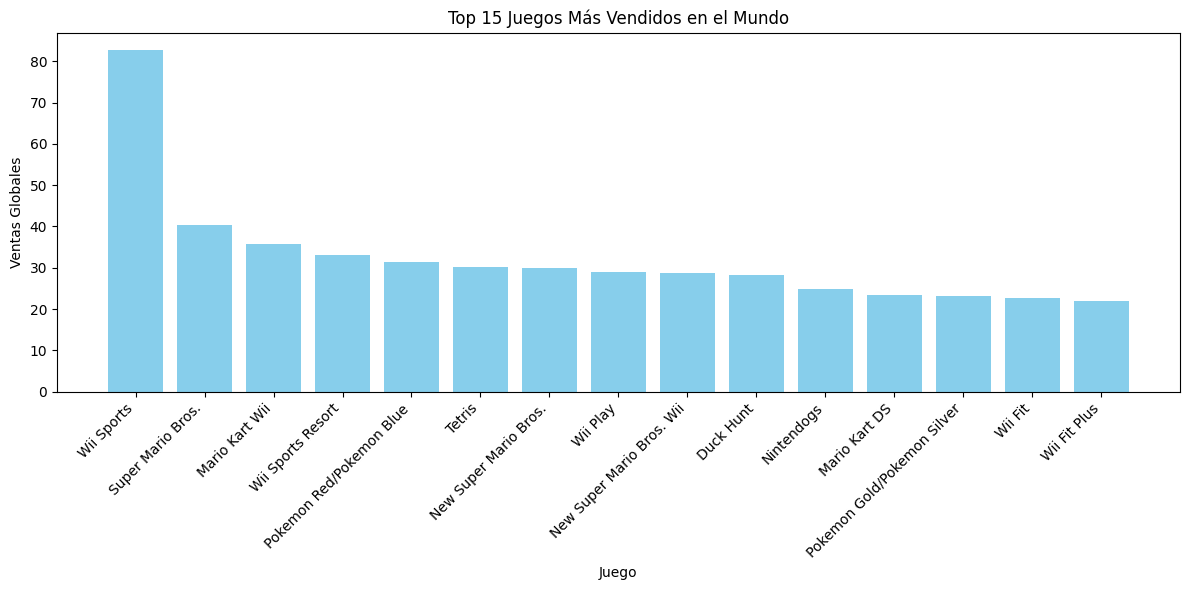

In [5]:
import matplotlib.pyplot as plt
# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top['Name'], top['Global_Sales'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Ventas Globales')
plt.title('Top 15 Juegos Más Vendidos en el Mundo')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Top 5 Juegos más vendidos por región

In [ ]:
top_na = df.sort_values(by='NA_Sales', ascending=False).head(5)
top_eu = df.sort_values(by='EU_Sales', ascending=False).head(5)
top_jp = df.sort_values(by='JP_Sales', ascending=False).head(5)
top_oth = df.sort_values(by='Other_Sales', ascending=False).head(5)
print(top_na[['Rank', 'Name', 'NA_Sales']], "\n", top_eu[['Rank', 'Name', 'EU_Sales']], "\n", top_jp[['Rank', 'Name', 'JP_Sales']], "\n", top_oth[['Rank', 'Name', 'Other_Sales']])

#### Juegos con media de ventas en Europa por encima de la media en Europa

#### Total ventas agrupadas por región y categoría

#### Sumas de las ventas por región y porcentaje correspondiente

#### Total ventas por región y año

#### Número de juegos de cada editor (gráfico)

#### Total ventas por región y editor

#### Ventas ordenadas por plataforma y región

#### Ventas por género (gráfico)

#### Indicar cual es el juego más popular, el género, el editor y la plataforma de todos los tiempos | siglo XX | siglo XXI

#### Tendencias de ventas de videojuegos a lo largo de los años

#### Gráfico que relacione las ventas globales y la plataforma. Interesante que aparezcan desglosados por genero (histograma estratificado)

#### Los 10 años con más ventas en Japón (gráfico)

#### Tipo de juego más vendido en cada región

#### Listado del editor que más juegos ha lanzado en cada año

## Análisis de datos exploratorio

### ¿Existe alguna correlación en el siglo XX para los juegos más vendidos por región?

#### ¿Y para el siglo XXI?

#### ¿Es la misma tendencia si tomamos los datos de todos los años?

### ¿Hay información incorrecta o nula?

#### Si es así, ¿desvirtúa el resultado?

### ¿Cuáles son los 5 años en los cuales aparecieron más juegos?

#### ¿Se puede encontrar una explicación?

#### ¿Y si desglosamos esos 5 años por género?

### ¿Qué genero ha sido el más versionado en algún momento? (referido a datos de un año)

#### ¿Tiene sentido?

### ¿Se corresponde de alguna manera los editores que más venden con los que más juegos lanzan?

#### ¿existe alguna correlación?